In [68]:
# 만약 wordcloud가 없으면 설치하시오.
# pip install wordcloud

In [10]:
# wordcloud 임포트
# matplotlib 임포트
from wordcloud import WordCloud as wd
import matplotlib.pyplot as plt
%matplotlib inline
import wordcloud

In [11]:
wordcloud.__version__

'1.8.1'

### wordcloud

- 파이썬 wordcloud는 중요한 단어나 키워드를 시각화해서 보여주는 시각화도구이다.
- 자체적으로 빈도수를 계산하는 기능이 있다.

### wordcloud 객체 생성
WordCloud(font_path=None, width=400, height=200, margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=None, max_words=200, min_font_size=4, stopwords=None, random_state=None, background_color='black', max_font_size=None, font_step=1, mode='RGB', relative_scaling='auto', regexp=None, collocations=True, colormap=None, normalize_plurals=True, contour_width=0, contour_color='black', repeat=False, include_numbers=False, min_word_length=0, collocation_threshold=30)

- **wc = WordCloud(옵션)**
    - 다양한 옵션이 있다. 일부만 살펴보자
        - font_path : 폰트의 경로 
            - (한글 폰트인 경우 넣어줘야한다. 안그러면 이미지가 이상해진다.)
        - background_color : 배경색 지정(default=black)
        - width : 가로폭 지정
        - height : 세로폭 지정
        - max_words : 이미지에 넣을 최대 word 수를 지정
        - max_font_size : 이미지에 넣을 최대 폰트 크기를 지정
    
 

# wordcloud 예제
- ebs - ladybug 게시판 워드클라우드 만들어보기

In [13]:
# 크롤링 필요 라이브러리 임포트
from bs4 import BeautifulSoup
import urllib.request
from collections import Counter

In [12]:
def Test1() :
    list_res01 = []  # 날짜
    list_res02 = []  # 내용
    f = open('C:\\Users\\JAY\\Desktop\\TIL\\miniproject\\miniproject1_crawling\\mytest.txt',
             'w', encoding='utf-8')
    # 1. 웹에서 html 문서를 가져와서 beautifulsoup로 파싱
    for i in range(1, 23):
        list_url = 'https://home.ebs.co.kr/ladybug/board/6/10059819/oneBoardList?c.page=' + str(i) + '&hmpMnuId=106&searchCondition=&searchConditionValue=0&searchKeywordValue=0&searchKeyword=&bbsId=10059819&'
        url = urllib.request.Request(list_url)

        result = urllib.request.urlopen(url).read().decode('utf-8')

        soup = BeautifulSoup(result, 'html.parser')

        # 2. 게시판의 날짜와 본문의 내용을 가져온다.
        result01 = soup.find_all('span', class_='date')
        result02 = soup.find_all('p', class_='con')

        # 3. 게시판의 날짜와 본문을 리스트 객체에 담자.
        for i in result01:
            list_res01.append(i.get_text(' ', strip=True))
        for j in result02:
            list_res02.append(j.get_text(' ', strip=True))

            
    # 4. 날짜와 본문을 같이 출력
    for k, h in zip(list_res01, list_res02):
        f.write(k + ' ' + h+'\n')
    f.close()

In [14]:
def Test2() :
    res01 = open('C:\\Users\\JAY\\Desktop\\TIL\\miniproject\\miniproject1_crawling\\mytest.txt', encoding='UTF8')
    res02 = res01.read().split() # 어절별로 분리를 해서 리스트에 리턴한다.
    # print(res01)
    res02.sort() # 리스트 안의 요소들을 정렬한다.

    countlist = Counter(res02) # res02 리스트안에 어절별로 각각 건수를 카운트
    # print(countlist)

    result = countlist.most_common(100)

    return result

In [15]:
Test2()

[('레이디버그', 100),
 ('너무', 58),
 ('빨리', 36),
 ('정말', 25),
 ('진짜', 25),
 ('시즌', 23),
 ('보고', 21),
 ('블랙캣', 21),
 ('2020.07.06', 20),
 ('다', 20),
 ('레이디', 18),
 ('더', 16),
 ('버그', 16),
 ('완전', 16),
 ('왜', 16),
 ('좀', 16),
 ('나왔으면', 15),
 ('제가', 15),
 ('재밌게', 14),
 ('그리고', 13),
 ('언제', 13),
 ('저', 12),
 ('수', 11),
 ('넘', 10),
 ('레이디버그를', 10),
 ('레이디버그와', 10),
 ('이거', 10),
 ('2020.07.13', 9),
 ('2기', 9),
 ('ㅋㅋ', 9),
 ('ㅠㅠ', 9),
 ('꼭', 9),
 ('다시', 9),
 ('시즌3', 9),
 ('제발', 9),
 ('좋아하는', 9),
 ('같이', 8),
 ('나오면', 8),
 ('볼', 8),
 ('좋겠어요', 8),
 ('2016.04.28', 7),
 ('2016.04.30', 7),
 ('3', 7),
 ('3기', 7),
 ('꿀잼', 7),
 ('시즌2', 7),
 ('어떻게', 7),
 ('우리', 7),
 ('잘', 7),
 ('재밌어요', 7),
 ('전', 7),
 ('제', 7),
 ('2016.03.19', 6),
 ('20:51', 6),
 ('너무너무', 6),
 ('돈을', 6),
 ('별', 6),
 ('좋아요', 6),
 ('프로그램', 6),
 ('하는', 6),
 ('혹시', 6),
 ('14:03', 5),
 ('2015.09.01', 5),
 ('2016.01.11', 5),
 ('2016.08.23', 5),
 ('^^', 5),
 ('ㅋㅋㅋ', 5),
 ('ㅎㅎ', 5),
 ('넘넘', 5),
 ('노잼', 5),
 ('다른', 5),
 ('다운로드', 5),
 ('때문에', 5),
 ('마

In [24]:
print(type(ls))
d = dict(ls)
del d['레이디버그']
d

<class 'list'>


{'너무': 58,
 '빨리': 36,
 '정말': 25,
 '진짜': 25,
 '시즌': 23,
 '보고': 21,
 '블랙캣': 21,
 '2020.07.06': 20,
 '다': 20,
 '레이디': 18,
 '더': 16,
 '버그': 16,
 '완전': 16,
 '왜': 16,
 '좀': 16,
 '나왔으면': 15,
 '제가': 15,
 '재밌게': 14,
 '그리고': 13,
 '언제': 13,
 '저': 12,
 '수': 11,
 '넘': 10,
 '레이디버그를': 10,
 '레이디버그와': 10,
 '이거': 10,
 '2020.07.13': 9,
 '2기': 9,
 'ㅋㅋ': 9,
 'ㅠㅠ': 9,
 '꼭': 9,
 '다시': 9,
 '시즌3': 9,
 '제발': 9,
 '좋아하는': 9,
 '같이': 8,
 '나오면': 8,
 '볼': 8,
 '좋겠어요': 8,
 '2016.04.28': 7,
 '2016.04.30': 7,
 '3': 7,
 '3기': 7,
 '꿀잼': 7,
 '시즌2': 7,
 '어떻게': 7,
 '우리': 7,
 '잘': 7,
 '재밌어요': 7,
 '전': 7,
 '제': 7,
 '2016.03.19': 6,
 '20:51': 6,
 '너무너무': 6,
 '돈을': 6,
 '별': 6,
 '좋아요': 6,
 '프로그램': 6,
 '하는': 6,
 '혹시': 6,
 '14:03': 5,
 '2015.09.01': 5,
 '2016.01.11': 5,
 '2016.08.23': 5,
 '^^': 5,
 'ㅋㅋㅋ': 5,
 'ㅎㅎ': 5,
 '넘넘': 5,
 '노잼': 5,
 '다른': 5,
 '다운로드': 5,
 '때문에': 5,
 '마리네뜨': 5,
 '많이': 5,
 '아': 5,
 '아이가': 5,
 '아이들': 5,
 '안': 5,
 '이': 5,
 '있습니다.': 5,
 '재미있게': 5,
 '좋겠네요.': 5,
 '화요일': 5,
 '11:05': 4,
 '11:19': 4,
 '14:22': 4,
 '19:5

In [25]:
d = dict(ls)
d.keys()

dict_keys(['레이디버그', '너무', '빨리', '정말', '진짜', '시즌', '보고', '블랙캣', '2020.07.06', '다', '레이디', '더', '버그', '완전', '왜', '좀', '나왔으면', '제가', '재밌게', '그리고', '언제', '저', '수', '넘', '레이디버그를', '레이디버그와', '이거', '2020.07.13', '2기', 'ㅋㅋ', 'ㅠㅠ', '꼭', '다시', '시즌3', '제발', '좋아하는', '같이', '나오면', '볼', '좋겠어요', '2016.04.28', '2016.04.30', '3', '3기', '꿀잼', '시즌2', '어떻게', '우리', '잘', '재밌어요', '전', '제', '2016.03.19', '20:51', '너무너무', '돈을', '별', '좋아요', '프로그램', '하는', '혹시', '14:03', '2015.09.01', '2016.01.11', '2016.08.23', '^^', 'ㅋㅋㅋ', 'ㅎㅎ', '넘넘', '노잼', '다른', '다운로드', '때문에', '마리네뜨', '많이', '아', '아이가', '아이들', '안', '이', '있습니다.', '재미있게', '좋겠네요.', '화요일', '11:05', '11:19', '14:22', '19:50', '2015.09.05', '2015.11.03', '2015.11.24', '2016.01.22', '2016.03.08', 'dvd', 'ㅠㅠㅠ', '기다리고', '다시보기가', '되고', '둘이', '딸아이가'])

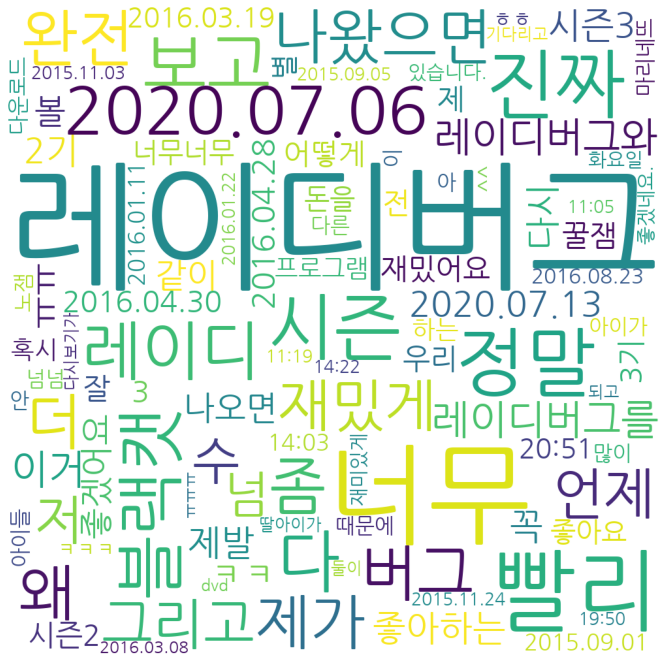

In [17]:
ls = Test2()
font_path='C:\\Windows\\Fonts\\NanumGothic.ttf'
wc = WordCloud(font_path, background_color='white',width=1000,height=1000,max_words=100,max_font_size=300)
plt.figure(figsize=(12,12))
plt.imshow(wc.generate_from_frequencies(dict(ls)))
plt.axis("off")
plt.show()

In [80]:
f = open('C:\\Users\\JAY\\Desktop\\TIL\\miniproject\\miniproject1_crawling\\mytest.txt',
             'r', encoding='utf-8')
f.read()

'2021.02.19 16:07 와 진짜 만화 안보는데 이건 너무 좋아요~!!!\n\n어제 꿈에 나옴ㅋㅋㅋㅋㅋ\n2021.01.21 11:19 레이디버그 찐 팬이에요 \n\n꿈에도 나왔어요\n2020.12.18 22:33 최고의 히어로 만화에요.\n2020.12.11 19:52 재미있 다\n2020.12.11 19:06 어제 흐름상 종영 같지 않았는데 갑자기 끝이네요??\n2020.12.11 01:35 〈미라큘러스: 레이디버그와 블랙캣〉종영 안내!\n\n\n\n\n\n\n\n〈미라큘러스: 레이디버그와 블랙캣〉-시즌3가 \n\n\n\n방송 종료되었습니다, 그동안 시청해주셔서 감사드립니다!\n\n\n\n2021년 새로운 시즌으로 여러분을 찾아뵙도록 노력하겠습니다!\n\n\n\n고맙습니다~\n2020.12.10 12:43 아이들 때문에 보게 되었는데 어른인 제가 더 좋아하는 프로그램이 되었네요 아이들이랑 볼 때 너무 신나요 함께 볼 수 있는 보기 드문 애니매이션이라 더 좋네요 시즌 4도 너무 너무 기대되고 기다리고 있습니다\n2020.10.17 15:30 2021년이 빨리되서 레이디버그 시즌4를 보면 좋겠네요~\n2020.10.16 12:25 레이디버그... 제가 어렸을때도 너~~무 좋아 하던 방송 이에요!!!!!!!\n2020.10.15 21:04 이렇게 재미있는프로는 이 세상에 하나뿐이예요 아 그리고 뉴욕편은 언제 올려주시나요?\n2020.09.29 14:46 너모 재밌어요!!! 저 시즌 1부터 다 본방으로 챙겨본 미라큘러 입니다ㅋㅋㅋ 진짜  재밌구요 팬카페랑 이런데도 다 가입해있어요... 방도 레이디버그 사진으로 덕-질☆\n2020.09.29 11:30 완전 재밌다\n2020.09.21 08:17 근뎅.....오즈 긑나서....레이디버그가 하는거잖아여....ㅠ\n2020.09.21 08:16 우왕!\n2020.09.20 09:07 넘재밌어요.매일하면 좋겠어요\n2020.09.19 22:52 재밌어요 완전 꿀잼이요 사랑합니다\n2020.09.16 12:34 ㅎㅎ

### wordcloud 도움말

In [4]:
help(WordCloud)

Help on class WordCloud in module wordcloud.wordcloud:

class WordCloud(builtins.object)
 |  WordCloud(font_path=None, width=400, height=200, margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=None, max_words=200, min_font_size=4, stopwords=None, random_state=None, background_color='black', max_font_size=None, font_step=1, mode='RGB', relative_scaling='auto', regexp=None, collocations=True, colormap=None, normalize_plurals=True, contour_width=0, contour_color='black', repeat=False, include_numbers=False, min_word_length=0, collocation_threshold=30)
 |  
 |  Word cloud object for generating and drawing.
 |  
 |  Parameters
 |  ----------
 |  font_path : string
 |      Font path to the font that will be used (OTF or TTF).
 |      Defaults to DroidSansMono path on a Linux machine. If you are on
 |      another OS or don't have this font, you need to adjust this path.
 |  
 |  width : int (default=400)
 |      Width of the canvas.
 |  
 |  height : int (defaul

In [6]:
help(WordCloud.generate_from_frequencies)

Help on function generate_from_frequencies in module wordcloud.wordcloud:

generate_from_frequencies(self, frequencies, max_font_size=None)
    Create a word_cloud from words and frequencies.
    
    Parameters
    ----------
    frequencies : dict from string to float
        A contains words and associated frequency.
    
    max_font_size : int
        Use this font-size instead of self.max_font_size
    
    Returns
    -------
    self



In [79]:
help(WordCloud.generate)

Help on function generate in module wordcloud.wordcloud:

generate(self, text)
    Generate wordcloud from text.
    
    The input "text" is expected to be a natural text. If you pass a sorted
    list of words, words will appear in your output twice. To remove this
    duplication, set ``collocations=False``.
    
    Alias to generate_from_text.
    
    Calls process_text and generate_from_frequencies.
    
    Returns
    -------
    self



### 참고
- import sys
- sys.argv

sys.argv는 프로그램을 실행할 때 입력된 값을 읽어 들일 수 있는 파이썬 라이브러리이다. sys.argv[0]는 입력받은 값 중에서 파이썬 프로그램 이름인 memo.py이므로 우리가 만들려는 기능에는 필요 없는 값이다. 그리고 순서대로 sys.argv[1]은 프로그램 실행 옵션 값이 되고 sys.argv[2]는 메모 내용이 된다.

In [26]:
help(plt.axis)

Help on function axis in module matplotlib.pyplot:

axis(*args, emit=True, **kwargs)
    Convenience method to get or set some axis properties.
    
    Call signatures::
    
      xmin, xmax, ymin, ymax = axis()
      xmin, xmax, ymin, ymax = axis([xmin, xmax, ymin, ymax])
      xmin, xmax, ymin, ymax = axis(option)
      xmin, xmax, ymin, ymax = axis(**kwargs)
    
    Parameters
    ----------
    xmin, xmax, ymin, ymax : float, optional
        The axis limits to be set.  This can also be achieved using ::
    
            ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    
    option : bool or str
        If a bool, turns axis lines and labels on or off. If a string,
        possible values are:
    
        ======== ==========================================================
        Value    Description
        ======== ==========================================================
        'on'     Turn on axis lines and labels. Same as ``True``.
        'off'    Turn off axis lines an

In [32]:
import numpy as np
a = np.zeros((5,6)
print(a)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [34]:
a.shape

(5, 6)

In [36]:
from PIL import Image

In [37]:
image = Image.open('exam.jpg')
mask = np.array(image)

In [38]:
print(mask)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [42]:
mask.shape

(421, 421, 3)